
# <p><center style="background-color:#d896ff;font-family:Gabriola;color:#660000;font-size:210%;text-align:center;border-radius:10px 70px;">   Prediction Prices - Car </center></p>

# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 🔠</p>

# About The DataSet

- The dataset used in this analysis contains information about car prices and their associated features. Here's a brief overview of the dataset:

#### Columns: The dataset consists of several columns including:

- Make: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford).
- Model: The specific model of the car (e.g., Camry, Civic, F-150).
- Year: The manufacturing year of the car.
- Mileage: The total mileage (in miles) of the car.
- Condition: The condition of the car, categorized as Excellent, Good, or Fair.
- Price: The price of the car.

### The Mission 🎈 :
- Make the Analysis
- Make ML- Model - Prediction 

In [1]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.express as px


In [2]:
#Importing the dataset

df=pd.read_csv("/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv")

# look the dataset
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


<a id="2"></a>
# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1️⃣ Explore the Data and Make Preprocess </p>

In [3]:
# remove the first column - no need

df.drop(columns="Unnamed: 0",axis=1, inplace=True)

In [4]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


- 📑 we have data type object and int, float, when start ML all this object should be converted  to number 

In [5]:
# check the missing value - Null 
df.isna().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

- 📄 No any missing data / missing value 

In [6]:
# let show the describe the numeric feature 
df.describe().round(2)

,Year,Mileage,Price
count,1000.00,1000.00,1000.00
mean,2015.86,78796.93,22195.21
std,3.78,39842.26,4245.19
min,2010.00,10079.00,12613.00
25%,2013.00,44942.75,18961.86
50%,2016.00,78056.50,22247.88
75%,2019.00,112366.25,25510.28
max,2022.00,149794.00,31414.90


In [7]:
#check if there any duplication 
df.duplicated().sum()

0

- 📄 No Duplicated values 

In [8]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 1000 Rows and 6 columns


In [9]:
#let check what we have unique values in columns/ category columns
for i in df.columns:
    if df[i].dtypes == 'O':
        print (f"We have in column {i} unique values : {  df[i].unique()}")

We have in column Make unique values : ['Ford' 'Toyota' 'Chevrolet' 'Nissan' 'Honda']
We have in column Model unique values : ['Silverado' 'Civic' 'Altima' 'Camry' 'F-150']
We have in column Condition unique values : ['Excellent' 'Good' 'Fair']


<a id="2"></a>
# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2️⃣ Explore Data using some Visuals </p>

<Axes: >

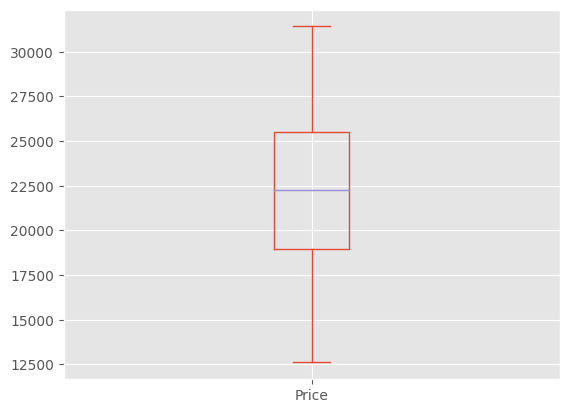

In [10]:
# let check the outlier in column price 

df["Price"].plot(kind="box")

- 🎯 It`s great / no outlier values in the price 

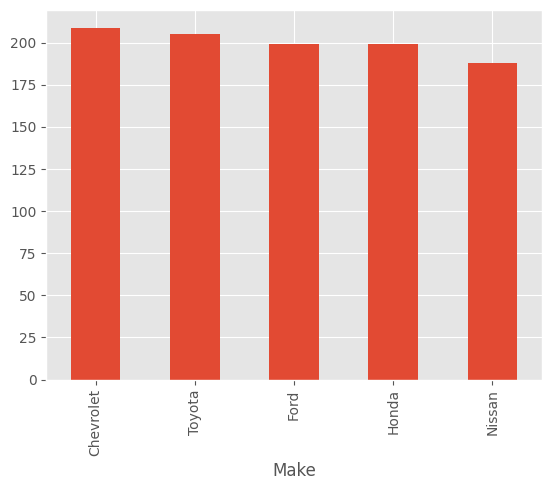

In [11]:
# what the common car in the dataset 

df["Make"].value_counts().plot(kind= "bar")
plt.show()

- ⛳ All cars the same count/ number

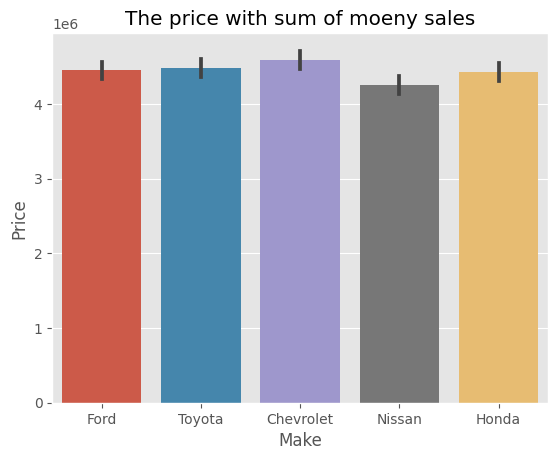

In [12]:
# compare the price with the type of cars

sns.barplot(df,x="Make",y="Price",estimator='sum')
plt.title("The price with sum of moeny sales")
plt.show()

In [13]:
# make group by with Make and Model and the sum price
Gr_M_P = df.groupby(["Make","Model"],as_index=False)["Price"].sum()
Gr_M_P

,Make,Model,Price
0,Chevrolet,Altima,1070390.10
1,Chevrolet,Camry,898420.90
2,Chevrolet,Civic,825398.20
3,Chevrolet,F-150,1033376.00
4,Chevrolet,Silverado,761470.35
5,Ford,Altima,895890.00
6,Ford,Camry,1039696.80
7,Ford,Civic,868417.15
8,Ford,F-150,843490.05
9,Ford,Silverado,801034.70


In [14]:
# let`s visulal the group by - interactive graph 🎁
px.bar(Gr_M_P, x="Model",y="Price",animation_frame="Make")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


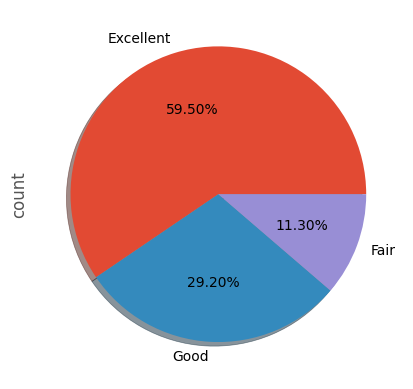

In [15]:
# what the common condition in the dataset 

df["Condition"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

- ♥ The Condition :
- 🔍 Excellent = 59.5 %
- 🔍 Good = 29.2 %
- 🔍 Fair = 11.30 %

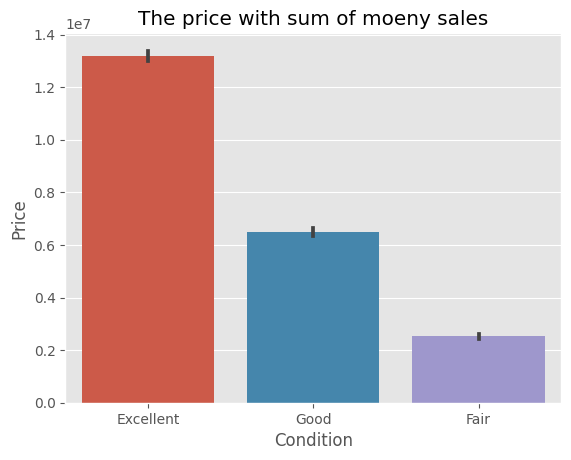

In [16]:
# compare the price with the condition of cars

sns.barplot(df,x="Condition",y="Price",estimator='sum')
plt.title("The price with sum of moeny sales")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



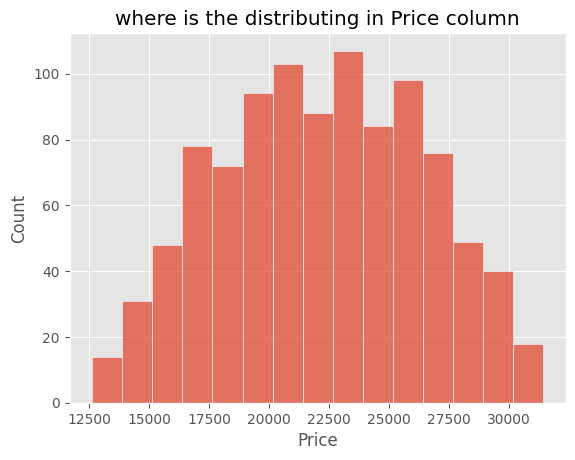

In [17]:
# using histogram, to show the numerical columns where is the distributing

#first let`s show the price column 
sns.histplot(data= df, x="Price")
plt.title("where is the distributing in Price column")
plt.show()

- 🎃 The more price between - 20 K to 25 K

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



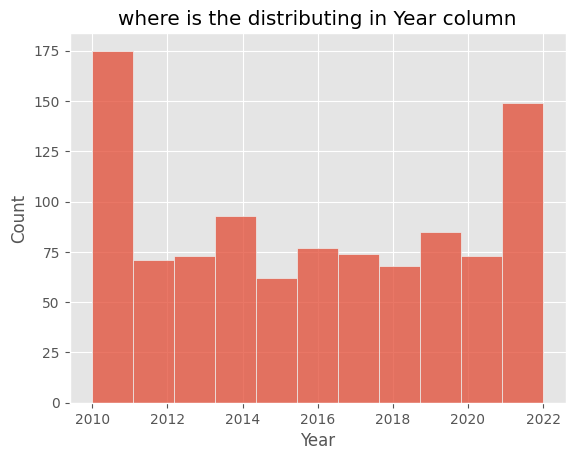

In [18]:
#sconde  let`s show the years column 
sns.histplot(data= df, x="Year")
plt.title("where is the distributing in Year column")
plt.show()

- 👓 The common years 2010 & 2022 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



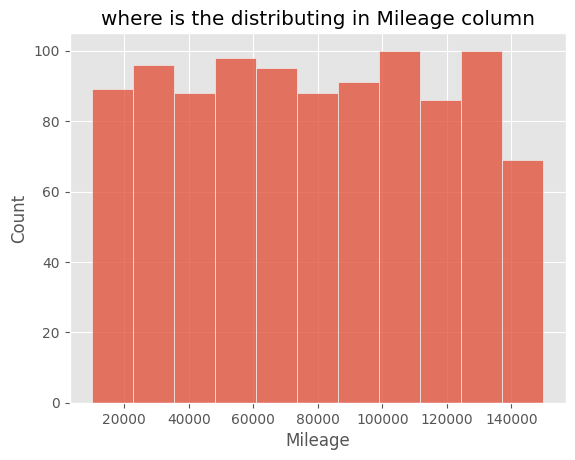

In [19]:
#third let`s show the Mileage column 
sns.histplot(data= df, x="Mileage")
plt.title("where is the distributing in Mileage column")
plt.show()

- 😶 In general the mileage is close together

#### 🙂 let`s show the numerical columns with the price  🙃

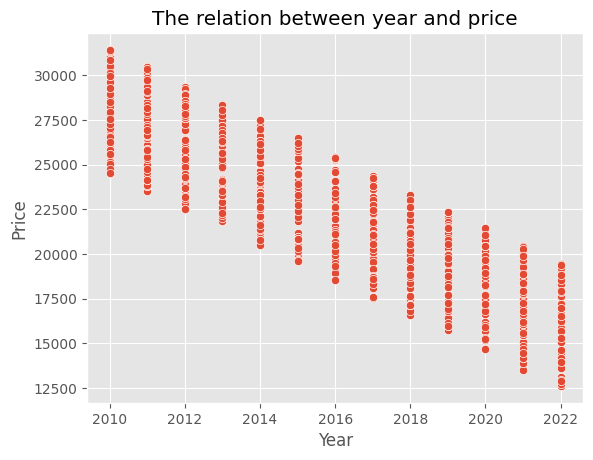

In [20]:
# there any relation between price and the year ?

sns.scatterplot(df, x="Year", y="Price")
plt.title("The relation between year and price")
plt.show()

- 🎯 we see the old model cars have the high price, and the new cars have the low price / in average .

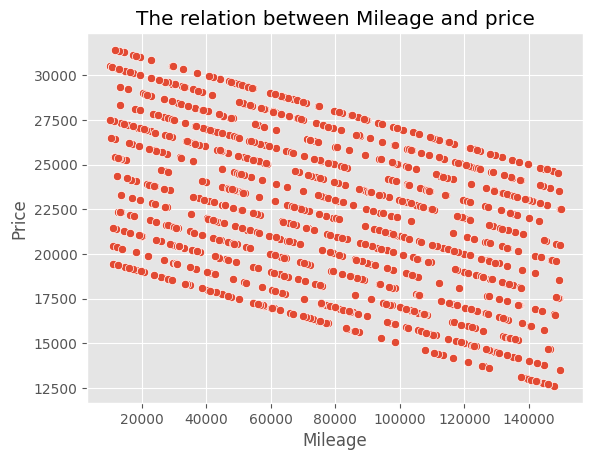

In [21]:
# there any relation between price and the Mileage ?

sns.scatterplot(df, x="Mileage", y="Price")
plt.title("The relation between Mileage and price")
plt.show()

- ✨ The price be low when the mileage be increase.

<div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:85px;";><font style="font-family:Georgia; font-size:200%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Analysis Result</p>
       

 -🎖 After exploring the data and made some visualization to easy to understand the data we can start building the ML model.

    
 -🎖  Now we are aware about all the data set

<a id="3"></a>
# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3️⃣ Building a Machine Learning Model </p>

In [22]:
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score



from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder # for make encoding / change from the category to numerical columns

In [23]:
#show the data again
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [24]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # new dataframe just type numeric
data_c=df[cat]  # new dataframe just type object

In [25]:
# let start make the encoding 

label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

/tmp/ipykernel_18/2383997895.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/2383997895.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/2383997895.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# let show the new columns after encoding
data_c

,Make,Model,Condition
0,1,4,0
1,4,4,0
2,0,2,2
3,1,2,0
4,0,2,0
...,...,...,...
995,3,1,0
996,0,3,0
997,1,0,2
998,4,4,2


In [27]:
# merge 2 data set 
frames = [data_c, data_n]
  
data = pd.concat(frames,axis=1)

In [28]:
#show the new dataframe after change the category columns
data.head()

,Make,Model,Condition,Year,Mileage,Price
0,1,4,0,2022,18107,19094.75
1,4,4,0,2014,13578,27321.10
2,0,2,2,2016,46054,23697.30
3,1,2,0,2022,34981,18251.05
4,0,2,0,2019,63565,19821.85


In [29]:
#show the data type - new dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   int64  
 1   Model      1000 non-null   int64  
 2   Condition  1000 non-null   int64  
 3   Year       1000 non-null   int64  
 4   Mileage    1000 non-null   int64  
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


- 🧧 All the columns / Data type numerical

### 👓  Now split the Data 🎨

In [30]:
#Defined X value and y value , and split the data train
X = data.drop(columns="Price")           
y = data["Price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # split 25% test 75 % train

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (750, 5)
X Test  :  (250, 5)
Y Train :  (750,)
Y Test  :  (250,)


In [31]:
#Defined object from library Regression  / from the libraries import before / 6 model

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
SVR = SVR()

In [32]:
# make for loop for Regression 

li = [LR ,DTR ,RFR ,KNR ,MLP  ,SVR ]
score = []
for i in li:
    i.fit(X_train,y_train)   #traing the model
    ypred = i.predict(X_test) # start to predct
    score.append([i,r2_score(y_test,ypred)*100])
    

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [33]:
Score_df = pd.DataFrame(score)
Score_df.columns =['Model', 'Score']
Score_df

,Model,Score
0,LinearRegression(),100.000000
1,DecisionTreeRegressor(),99.673311
2,"(DecisionTreeRegressor(max_features=1.0, rando...",99.910715
3,KNeighborsRegressor(),5.417759
4,MLPRegressor(),15.893572
5,SVR(),0.984155


 <div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:150%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Result ML</p>

- 🎁 In my opinion the 🏐DecisionTreeRegressor🏐 the best model 99.6 % , I think happened overfitting in other model

#  📲 Connect me:
-  <a href="https://www.kaggle.com/qusaybtoush1990">kaggle</a>
-  <a href="https://www.linkedin.com/in/qusayal-btoush/">Linkedin</a>
-  <a href="https://github.com/qusaybtoush">github</a>

# Vote ❤️😃
- Please Upvote my kernel if you like my work.🙌

# The End 🤝🎉🤝🎉
### 🖐 Thank you 🙏